# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [118]:
# Importando as bibliotecas

import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [119]:
# Lendo a base de dados

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [120]:
# Criando a Matriz utilizando Patsy

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 0', tips)
X

DesignMatrix with shape (244, 5)
  sex[Male]  sex[Female]  smoker[T.No]  time[T.Dinner]  net_bill
          0            1             1               1     15.98
          1            0             1               1      8.68
          1            0             1               1     17.51
          1            0             1               1     20.37
          0            1             1               1     20.98
          1            0             1               1     20.58
          1            0             1               1      6.77
          1            0             1               1     23.76
          1            0             1               1     13.08
          1            0             1               1     11.55
          1            0             1               1      8.56
          0            1             1               1     30.26
          1            0             1               1     13.85
          1            0             1               1   

In [121]:
reg = smf.ols('tip ~ + np.log(net_bill)', data = tips).fit()
tips['res_log'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           4.40e-20
Time:                        13:37:20   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

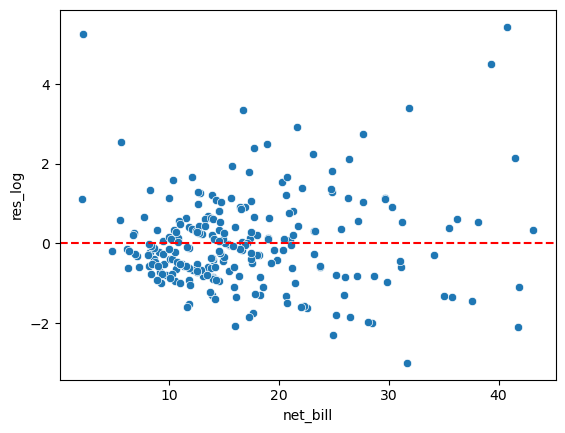

In [122]:
# Observando o gráfico de resíduos em função de 'net_bill'

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [123]:
reg = smf.ols('tip ~ + np.power(net_bill, 2)', data = tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           1.47e-20
Time:                        13:37:26   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

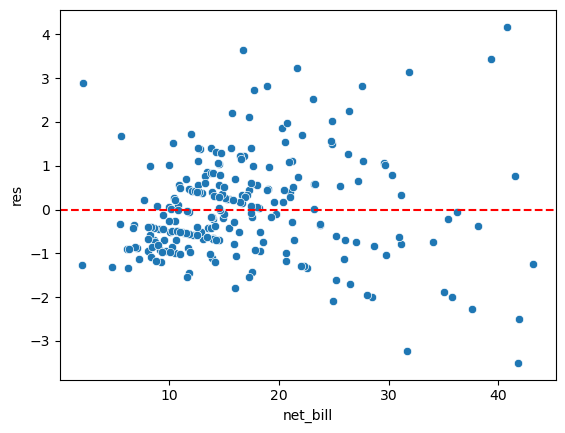

In [124]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

#### *Melhor modelo parece ser o modelo onde 'net_bill' é transformado em um polinômio de segundo grau

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [125]:
# Criando a Matriz utilizando Patsy

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill + 0', tips)
X

DesignMatrix with shape (244, 5)
  sex[Male]  sex[Female]  smoker[T.No]  time[T.Dinner]  net_bill
          0            1             1               1     15.98
          1            0             1               1      8.68
          1            0             1               1     17.51
          1            0             1               1     20.37
          0            1             1               1     20.98
          1            0             1               1     20.58
          1            0             1               1      6.77
          1            0             1               1     23.76
          1            0             1               1     13.08
          1            0             1               1     11.55
          1            0             1               1      8.56
          0            1             1               1     30.26
          1            0             1               1     13.85
          1            0             1               1   

In [126]:
reg = smf.ols('tip ~ + np.log(net_bill)', data = tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           4.40e-20
Time:                        13:37:34   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

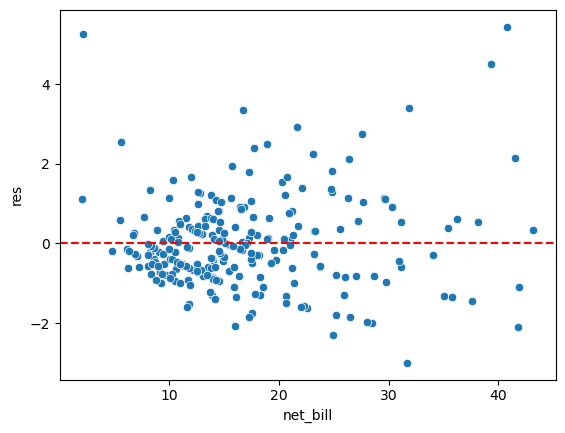

In [127]:
sns.scatterplot(x = 'net_bill', y = 'res', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [128]:
reg = smf.ols('tip ~ + np.power(net_bill, 2)', data = tips).fit()
tips['res'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           1.47e-20
Time:                        13:37:44   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
reg = smf.ols('np.log(tip) ~ + np.log(net_bill)', data = tips).fit()
tips['res_log'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           5.62e-22
Time:                        13:37:49   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

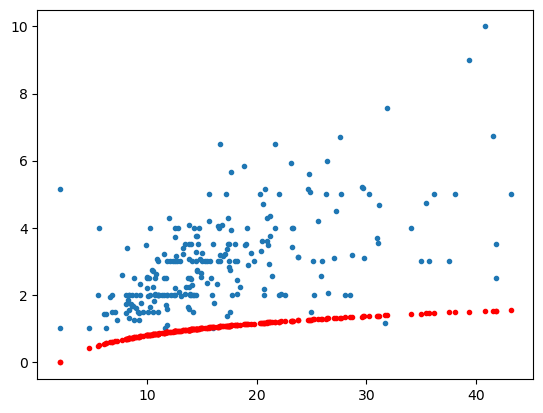

In [131]:
# comparado ao primeiro modelo o R² desse modelo parece ser mais agradável

tips['pred_log'] = reg.fittedvalues

plt.plot(tips['net_bill'], tips['tip'], '.')
plt.plot(tips['net_bill'], tips['pred_log'], 'r.')

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [220]:
# Carregando a base de dados

data = pd.read_csv('previsao_de_renda.csv')
data.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [221]:
# Fazendo a análise dos resíduos

reg = smf.ols('renda ~ tempo_emprego', data = data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:26:45   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

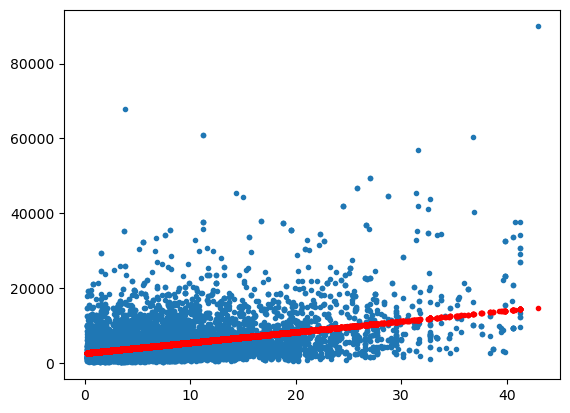

In [222]:
datadrop['pred_log'] = reg.fittedvalues

plt.plot(datadrop['tempo_emprego'], datadrop['renda'], '.')
plt.plot(datadrop['tempo_emprego'], datadrop['pred_log'], 'r.')

In [223]:
# Removendo algumas colunas insignificantes

datadrop = data.drop(['index', 'Unnamed: 0'], axis=1).copy()
datadrop.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [224]:
# ajustando o modelo com regressão múltipla 

reg = smf.ols('renda ~ + estado_civil + tipo_residencia + posse_de_imovel + posse_de_veiculo + sexo + tipo_renda + educacao + np.power(tempo_emprego, 2) + idade', data = datadrop).fit()
datadrop['res_log'] = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     170.4
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:26:50   Log-Likelihood:            -1.2190e+05
No. Observations:               12466   AIC:                         2.438e+05
Df Residuals:                   12443   BIC:                         2.440e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1634.7606    568.737      2.874      0.004     519.948    2749.573
estado_civil[T.Separado]          -272.0159    169.192     -1.608      0.108    -603.659      59.627
estado_civil[T.Solteiro]          -183.9653    120.363     -1.528      0.126    -419.895      51.965
estado_civil[T.União]             -110.0537    142.555     -0.772      0.440    -389.484     169.376
estado_civil[T.Viúvo]             -339.3670    249.116     -1.362      0.173    -827.673     148.939
tipo_residencia[T.Casa]           -231.5600    326.237     -0.710      0.478    -871.035     407.915
tipo_residencia[T.Com os pais]    -618.5875    365.923     -1.690      0.091   -1335.853      98.678
tipo_residencia[T.Comunitário]    -620.7351    629.627     -0.986      0.324   -1854.901     613.431
tipo_residencia[T.Estúdio]        -704.3309    543.179     -1.297      0.195   -1769.045     360.383
tipo_residencia[T.Governamental]  -767.9049    394.365     -1.947      0.052   -1540.921       5.111
posse_de_imovel[T.True]            305.9377     82.723      3.698      0.000     143.787     468.089
posse_de_veiculo[T.True]           -57.7908     84.110     -0.687      0.492    -222.659     107.077
sexo[T.M]                         2366.2612     87.414     27.070      0.000    2194.916    2537.607
tipo_renda[T.Bolsista]             -12.7443   2140.364     -0.006      0.995   -4208.188    4182.700
tipo_renda[T.Empresário]          1011.5573     89.455     11.308      0.000     836.213    1186.902
tipo_renda[T.Pensionista]         1856.1633   1427.224      1.301      0.193    -941.417    4653.743
tipo_renda[T.Servidor público]     569.7938    129.246      4.409      0.000     316.452     823.135
educacao[T.Pós graduação]         2157.4658   1073.355      2.010      0.044      53.525    4261.407
educacao[T.Secundário]            -106.2997    434.658     -0.245      0.807    -958.297     745.697
educacao[T.Superior completo]      472.3139    436.483      1.082      0.279    -383.260    1327.888
educacao[T.Superior incompleto]   -261.0831    467.671     -0.558      0.577   -1177.790     655.624
np.power(tempo_emprego, 2)          10.5733      0.208     50.878      0.000      10.166      10.981
idade                               23.5638      4.577      5.148      0.000      14.592      32.536
==============================================================================
Omnibus:                     9677.295   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           361739.084
Skew:                           3.408   Prob(JB):                         0.00
Kurtosis:                      28.495   Cond. No.                     1.26e+04
==============================================================

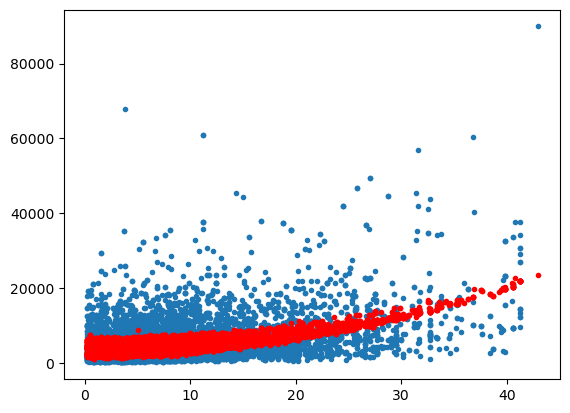

In [225]:
datadrop['pred_log'] = reg.fittedvalues

plt.plot(datadrop['tempo_emprego'], datadrop['renda'], '.')
plt.plot(datadrop['tempo_emprego'], datadrop['pred_log'], 'r.')

Pode-se observar que a qualidade do modelo subiu consideravelmente após o ajuste, saindo do R² de 0.155 para 0.232